In [58]:
# Modelagem de dados
import pandas as pd
import numpy as np

# Libs gráficas
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configurações no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configurações no Matplot
plt.rcParams['figure.figsize'] = ( 15, 6 )
plt.style.use('ggplot')


<h3> Importação dos dados </h3>

In [59]:
# Dados
Base_Dados = pd.read_csv('clean_data.csv')

# Diemnsao
Base_Dados.shape

(518675, 29)

In [60]:
# Veririfcar
Base_Dados.head()

,Unnamed: 0,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


In [61]:
# Info
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518675 entries, 0 to 518674
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  518675 non-null  int64  
 1   uf                          518675 non-null  object 
 2   type_id                     518675 non-null  int64  
 3   codigo_tse                  518675 non-null  int64  
 4   nome_municipio              518675 non-null  object 
 5   capital                     518675 non-null  int64  
 6   codigo_ibge                 518675 non-null  int64  
 7   job_count                   518675 non-null  int64  
 8   elector_count               518675 non-null  object 
 9   elector_presence            518675 non-null  int64  
 10  absentees                   518675 non-null  int64  
 11  nominal_votes               518675 non-null  int64  
 12  blank_votes                 518675 non-null  int64  
 13  total_null_vot

In [62]:
# Nulos
Base_Dados.isnull().sum()

Unnamed: 0                        0
uf                                0
type_id                           0
codigo_tse                        0
nome_municipio                    0
capital                           0
codigo_ibge                       0
job_count                         0
elector_count                     0
elector_presence                  0
absentees                         0
nominal_votes                     0
blank_votes                       0
total_null_votes                  0
null_votes                        0
technical_null_votes              0
valid_votes                       0
nulled_votes                      0
judically_nulled_votes            0
vote_count                        0
candidate_number                  0
candidate_name                    3
candidate_coligation              0
candidate_vice_name               0
candidate_vote_destination        0
candidate_vote_count              0
legend_votes                  18640
job                         

In [63]:
# Campos unicos
Base_Dados.nunique()

Unnamed: 0                    518675
uf                                26
type_id                            2
codigo_tse                      5568
nome_municipio                  5294
capital                            2
codigo_ibge                     5568
job_count                         33
elector_count                      2
elector_presence                4864
absentees                       3562
nominal_votes                   8361
blank_votes                     1784
total_null_votes                2194
null_votes                      2177
technical_null_votes             236
valid_votes                     8402
nulled_votes                      10
judically_nulled_votes          1046
vote_count                      4864
candidate_number               20334
candidate_name                394364
candidate_coligation            7941
candidate_vice_name            16997
candidate_vote_destination         4
candidate_vote_count            8730
legend_votes                    1736
j

In [64]:
# Retirar a coluna
Base_Dados.drop( columns=['Unnamed: 0'], inplace=True )

In [65]:
# Veririfcar
Base_Dados.head()

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


<h2> Análises Macros </h2>

In [66]:
# Cargos dessa base
Base_Dados['job'].unique()

array(['prefeito', 'vereador'], dtype=object)

In [67]:
# Consulta para saber se foi eleito
Base_Dados['elector_count'].unique()

array(['n', 's'], dtype=object)

<h4> Prefeitos eleitos </h4>

In [68]:
# Filtro dos prefeitos
Query_Prefeitos = Base_Dados[ 
    ( Base_Dados['job'] == 'prefeito' ) &
    ( Base_Dados['elector_count'] == 's' )
]

# Dimensão
Query_Prefeitos.shape

(5519, 28)

In [69]:
# Análise
Analise_01 = Query_Prefeitos.groupby( by=['main_party'] ).agg(
    Quantidade= ('candidate_vote_count', 'count')
)

# Verificar
Analise_01.head()

,Quantidade
main_party,
AVANTE,82
CIDADANIA,141
DC,1
DEM,467
MDB,787


In [70]:
# Quantidade Prefeitos Eleitos
Qtd_Prefeitos_Eleitos = Analise_01['Quantidade'].sum()

Qtd_Prefeitos_Eleitos

5519

In [71]:
# Gerar percentual
Analise_01['%'] = Analise_01['Quantidade'] / Qtd_Prefeitos_Eleitos * 100
Analise_01['%'] = round( Analise_01['%'], 2)

# Odernar
Analise_01.sort_values('Quantidade',inplace=True, ascending=False)

# Verificar 
Analise_01.head()

,Quantidade,%
main_party,,
MDB,787,14.26
PP,687,12.45
PSD,660,11.96
PSDB,526,9.53
DEM,467,8.46


In [72]:
# Paleta de cores
sns.color_palette('magma', len (Analise_01))

[(0.013708, 0.011771, 0.068667),
 (0.04383, 0.03383, 0.141886),
 (0.078815, 0.054184, 0.211667),
 (0.123833, 0.067295, 0.295879),
 (0.171713, 0.067305, 0.370771),
 (0.232077, 0.059889, 0.437695),
 (0.284951, 0.063168, 0.472451),
 (0.341482, 0.080564, 0.492631),
 (0.390384, 0.100379, 0.501864),
 (0.445163, 0.122724, 0.506901),
 (0.494258, 0.141462, 0.507988),
 (0.550287, 0.161158, 0.505719),
 (0.600868, 0.177743, 0.500394),
 (0.658483, 0.196027, 0.490253),
 (0.716387, 0.214982, 0.47529),
 (0.767398, 0.233705, 0.457755),
 (0.822926, 0.259016, 0.433573),
 (0.868793, 0.287728, 0.409303),
 (0.913354, 0.330052, 0.382563),
 (0.944006, 0.377643, 0.365136),
 (0.967671, 0.439703, 0.35981),
 (0.981, 0.498428, 0.369734),
 (0.990138, 0.565296, 0.395122),
 (0.994738, 0.62435, 0.427397),
 (0.997077, 0.690088, 0.471811),
 (0.997228, 0.747981, 0.516859),
 (0.99568, 0.812706, 0.572645),
 (0.99317, 0.870024, 0.626189),
 (0.989815, 0.934329, 0.690198)]

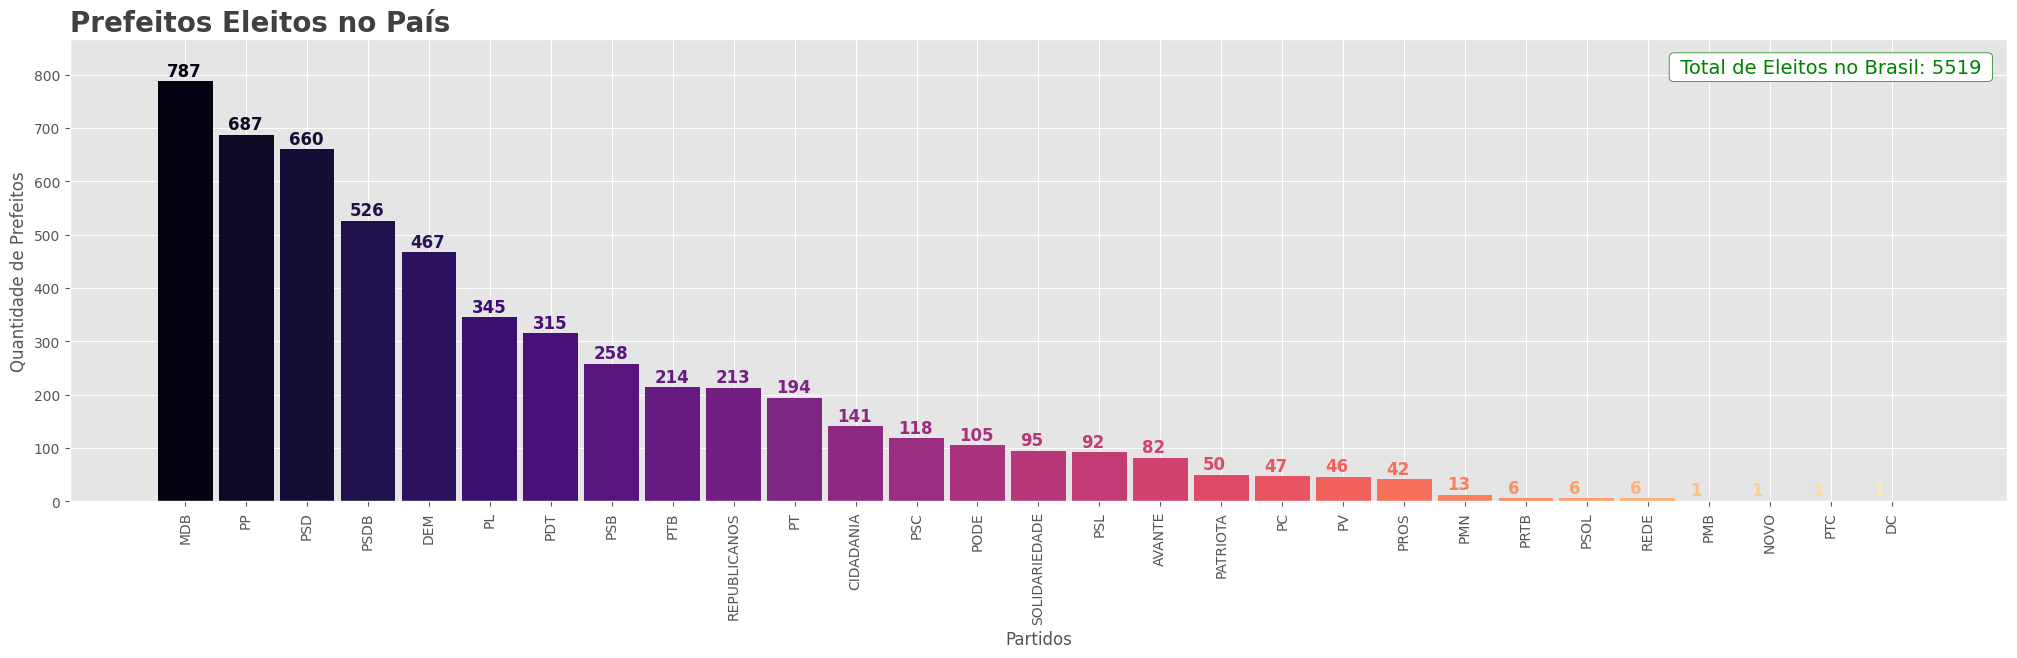

In [73]:
# Tamanho do gráfico
plt.figure( figsize=(25, 6) )

# Paleta
Paleta_Cores = sns.color_palette('magma', len (Analise_01))

# Plot 
plt.bar(
    Analise_01.index,
    Analise_01['Quantidade'],
    width=0.9,
    color=Paleta_Cores
)

# Título
plt.title('Prefeitos Eleitos no País', loc='left', fontsize=20, color='#404040', fontweight=600)

# Labels
plt.ylabel('Quantidade de Prefeitos')
plt.xlabel('Partidos')
plt.xticks(rotation=90);

# Ajustando a escala do gráfico
plt.ylim( 0, Analise_01['Quantidade'].max() + ( Analise_01['Quantidade'].max() * 0.1) )

# Incluindo dados no gráfico
for Posicao, Valor in enumerate( Analise_01['Quantidade']):
    plt.text(
        # Posição do gráfico ( x, y)
        Posicao -0.3, Valor +10,
        # Valor no gráfico
        Valor,
        # Paleta
        color=Paleta_Cores[Posicao],
        # Tamanho 
        size=12,
        # Espessura da fonte
        fontweight=700
    )

# Total de Eleitos
Total_Eleitos = Analise_01['Quantidade'].sum()

# Informação complementar 
plt.annotate(
    f' Total de Eleitos no Brasil: {Total_Eleitos} ',
    xy=(0.99, 0.94),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=14,
    fontweight=500,
    bbox=dict( facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25),
);

<h4> Prefeitos eleitos </h4>

In [74]:
# Filtro dos vereadores
Query_Vereadores = Base_Dados[ 
    ( Base_Dados['job'] == 'vereador' ) &
    ( Base_Dados['elector_count'] == 's' )
]

# Dimensão
Query_Vereadores.shape

(57866, 28)

In [75]:
# Análise
Analise_02 = Query_Vereadores.groupby( by=['main_party'] ).agg(
    Quantidade= ('candidate_vote_count', 'count')
)

# Verificar
Analise_02.head()

,Quantidade
main_party,
AVANTE,1046
CIDADANIA,1583
DC,121
DEM,4335
MDB,7311


In [76]:
# Quantidade de Veradores Eleitos
Qtd_Vereadores_Eleitos = Analise_02['Quantidade'].sum()

Qtd_Vereadores_Eleitos

57866

In [77]:
# Gerar percentual
Analise_02['%'] = Analise_02['Quantidade'] / Qtd_Vereadores_Eleitos * 100
Analise_02['%'] = round( Analise_02['%'], 2)

# Odernar
Analise_02.sort_values('Quantidade',inplace=True, ascending=False)

# Verificar 
Analise_02.head()

,Quantidade,%
main_party,,
MDB,7311,12.63
PP,6331,10.94
PSD,5676,9.81
PSDB,4368,7.55
DEM,4335,7.49


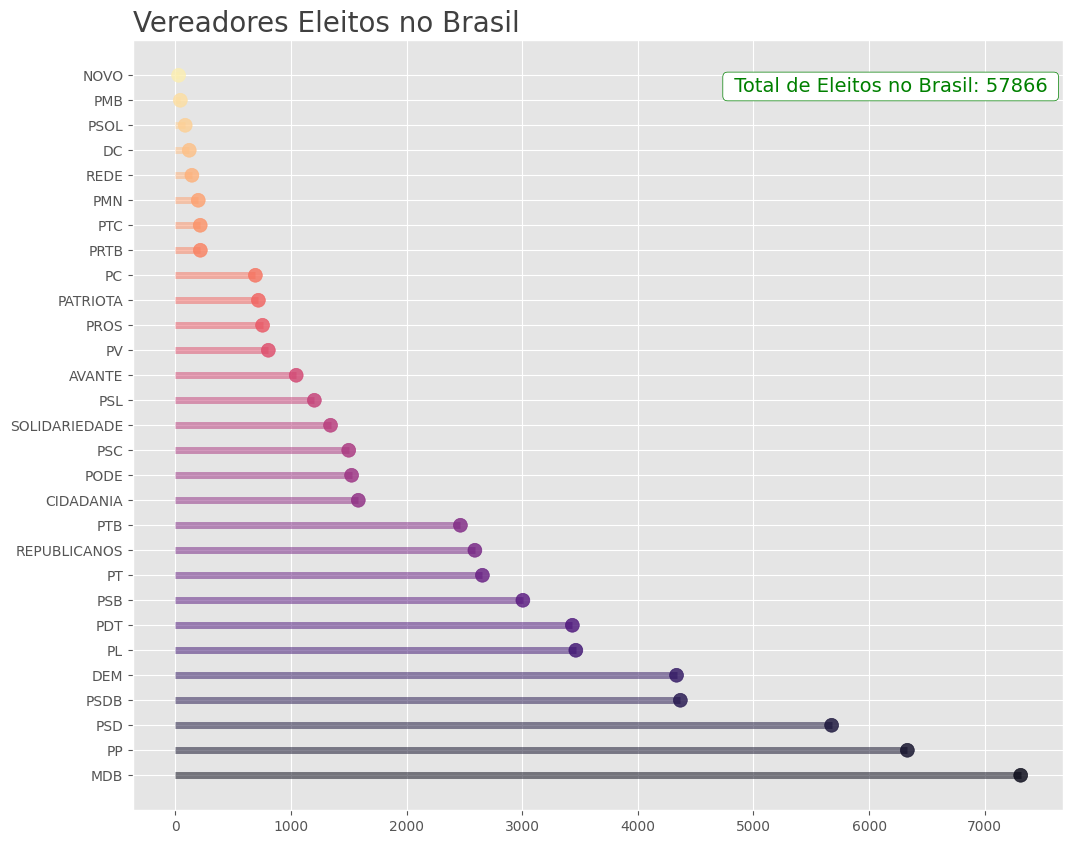

In [78]:
# Tamanho
plt.figure( figsize=(12, 10) )

# Plot das linhas
plt.hlines(
    # Dados
    y=Analise_02.index, 
    xmin=0, 
    xmax=Analise_02['Quantidade'],
    # Espessura da linha
    lw=5,
    # Paleta
    color=Paleta_Cores,
    #T ransparencia
    alpha=0.5
);

# Plot dos pontos
plt.scatter(
    # Dados
    Analise_02['Quantidade'],
    Analise_02.index,
    # Tamanho do ponto
    s=100,
    # Cor
    color=Paleta_Cores,
    # Tranparencia
    alpha=0.8,
)

# Título
plt.title('Vereadores Eleitos no Brasil', loc='left', fontsize=20, color='#404040', fontweight=500);

# Total de Eleitos
Total_Eleitos = Analise_02['Quantidade'].sum()

# Informação complementar 
plt.annotate(
    f' Total de Eleitos no Brasil: {Total_Eleitos} ',
    xy=(0.99, 0.94),
    xycoords='axes fraction',
    ha='right',
    va='center',
    color='green',
    fontsize=14,
    fontweight=500,
    bbox=dict( facecolor='#ffffff', edgecolor='green', boxstyle='round', pad=0.25),
);

<h3> Análise de Correlação </h3>

In [82]:
len(Analise_01), len(Analise_02)

(29, 29)

In [103]:
# Tabela 
Tab_Correlacao = Analise_01['Quantidade'].reset_index()

# Cruzamento
Tab_Correlacao = pd.merge( Tab_Correlacao, Analise_02.reset_index(), on=['main_party'], how='inner')

# Ajustes
Tab_Correlacao.columns = ['Partido', 'Prefeitos', 'Vereadores', '%']

# Drop coluna %
Tab_Correlacao.drop( columns=['%'], inplace=True)

Tab_Correlacao.head()

,Partido,Prefeitos,Vereadores
0,MDB,787,7311
1,PP,687,6331
2,PSD,660,5676
3,PSDB,526,4368
4,DEM,467,4335


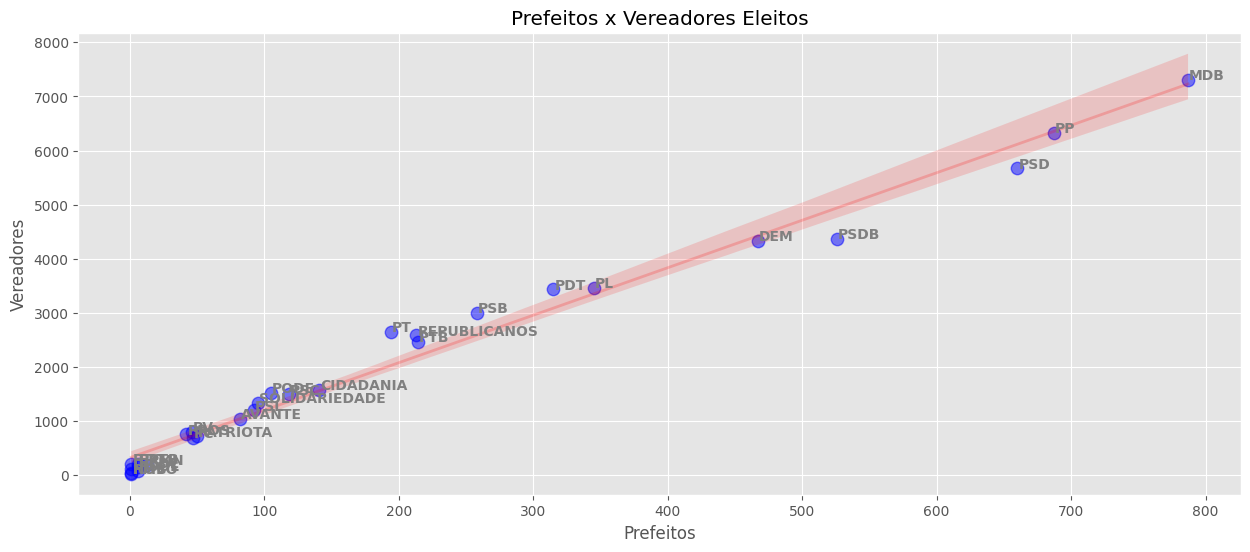

In [105]:
# Plot da regressão
sns.regplot(
    # Dados
    x=Tab_Correlacao['Prefeitos'],
    y=Tab_Correlacao['Vereadores'],

    # Intervalo de confiança par aestimar a regressão
    ci= 95,

    # Cor dos pontos
    scatter_kws={
        'color' : 'blue',
        's' : 80,
        'alpha' : 0.5
    },

    # Cor da linha
    line_kws={
        'color' : 'red',
        'alpha' : 0.2,
        'lw' : 2
    },
);

# Título
plt.title('Prefeitos x Vereadores Eleitos');

# Loop para incluir os textos
for Linha in range(0, Tab_Correlacao.shape[0] ):
    #Loop para incluir dados
    plt.text(
        Tab_Correlacao['Prefeitos'][Linha] + 0.8,
        Tab_Correlacao['Vereadores'][Linha],
        Tab_Correlacao['Partido'][Linha],
        size='medium',
        color='gray',
        weight='semibold'
    )